## Project Objective

Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cutresistant, longer-lasting golf ball. Therefore, the research group at Par has been investigating a new golf ball coating designed to resist cuts and provide a more durable ball. The tests with the coating have been promising. 

One of the researchers voiced concern about the effect of the new coating on driving distances. Par would like the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball. 

To compare the driving distances for the two balls, 40 balls of both the new and current models were subjected to distance tests. 

The testing was performed with a mechanical hitting machine so that any difference between the mean distances for the two models could be attributed to a difference in the design. 

The results of the tests, with distances measured to the nearest yard, are contained in the data set “Golf”. 

Prepare a Managerial Report

1. Formulate and present the rationale for a hypothesis test that par could use to compare the driving distances of the current and new golf balls

2. Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?

3. Do you see a need for larger sample sizes and more testing with the golf balls? Discuss.

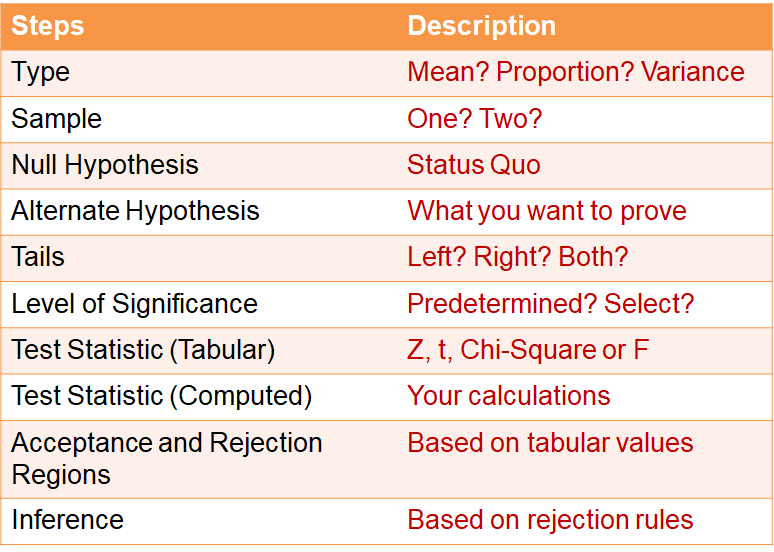

# Type :- Mean
# Sample :- Two
# Null Hypothesis :-
# Alternate Hypothesis :-
# Tails :-
# Level of significance 
# Test Stats 


In [58]:
import numpy as np
from scipy.stats import ttest_ind, levene, shapiro, iqr
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
xlsfile = pd.ExcelFile('SM4-Golf.xls')

In [60]:
dframe = xlsfile.parse('Data')

In [61]:
a= dframe.Current
b=dframe.New

In [55]:
dframe.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


In [56]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes


# 1. Test of Normality 


#1. histogram 
#2. Skew & kurtosis 
#3. Probablity plot ( shapiro test )
#4 Chi-sequre goodness of fit 

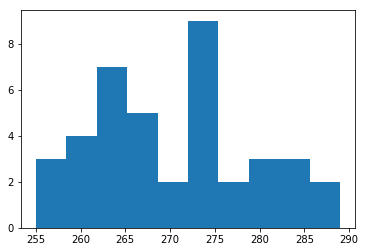

In [7]:

# HIstogram 
plt.hist(a)
plt.show()

In [26]:
# Skew and kurtosis 

import scipy.stats as st

print ('kurtosis is',st.kurtosis(a))
print ('Skew is ',st.skew(a))

kurtosis is -0.8168840741950509
Skew is  0.29456628634379833


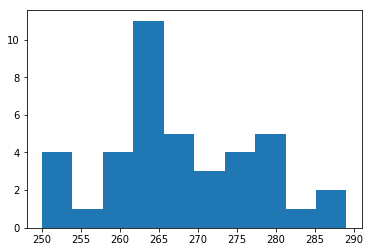

In [8]:
# Histogram 

plt.hist(b)
plt.show()

In [27]:

print ('kurtosis is',st.kurtosis(b))
print ('Skew is ',st.skew(b))

kurtosis is -0.59881719251117
Skew is  0.23072220761583526


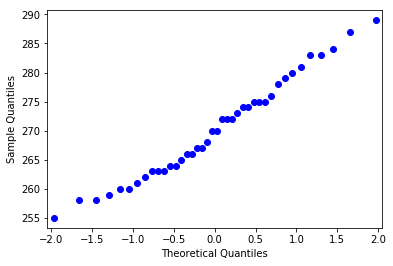

In [23]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
#data = sm.datasets.longley.load()
#data.exog = sm.add_constant(data.exog)
#mod_fit = sm.OLS(data.endog, data.exog).fit()
#res = mod_fit.resid # residuals
fig = sm.qqplot(a)
plt.show()

In [62]:

# Test of normality 

# H0 :- Data is normal 
# Ha :- Data is not normal 

#1. histogram 
#2. Skew & kurtosis 
#3. Probablity plot 
#4 Chi-sequre goodness of fit 
shapiro(a)

(0.9707046747207642, 0.378787100315094)

In [10]:
shapiro(b)

(0.9678263664245605, 0.3064655363559723)

# Test of Homogenity 

In [11]:
#Bartletts test 
# H0: The groups are homogenous in variance 
# Ha: The groups are not homogenous in variance 

levene(a,b)

LeveneResult(statistic=0.2553238291765741, pvalue=0.6147759523331309)

#  Run the Two Sample Test

In [0]:
# H0 : m1= m2
# Ha : m1 <> m2 
t,p = ttest_ind(a,b)
print(t,p)

1.32836159352 0.187932284919


In [18]:
import scipy

In [12]:
def sample_power_difftest(d,s,power=0.8,sig=0.05):
    z = scipy.stats.norm.isf([sig/2])
    zp = -1 * scipy.stats.norm.isf([power])
    n = (2*(s**2)) * ((zp+z)**2) / (d**2)
    return int(round(n[0]))

In [13]:
mean_current=a.mean()
mean_new=b.mean()

In [20]:
std_current=a.std()
std_new=b.std()

print('Std_current',std_current,'std_new',std_new)

Std_current 8.752984838884597 std_new 9.896904462947894


In [15]:
d = mean_current - mean_new

In [28]:
s = np.sqrt(((8.753**2)+(9.897**2))/2)
print(s,d)

9.342526906570834 2.7749999999999773


In [19]:
n=sample_power_difftest(d,s,power=0.8,sig=0.5)

In [40]:
E_size = d/s
print(E_size)

0.2970288475217824


# Power of Test

In [65]:
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
#effect = 0.8
effect = d/s
alpha = 0.05
power = 0.8
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(0.8, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

print( effect)

Sample Size: 25.525
0.2970288475217824


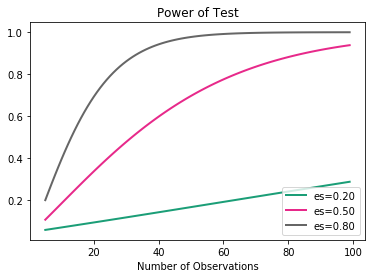

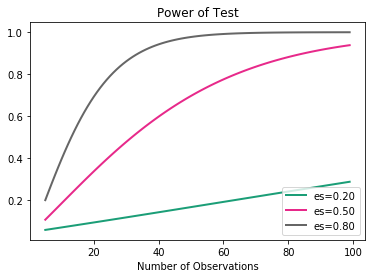

In [50]:
import numpy as np
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=np.arange(5, 100), effect_size=np.array([0.2, 0.5, 0.8]))